# Data Smart - WineKMC

## Kirjastot

In [1]:
# Tarvittavat kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

## Datan pyörittely sopivaan muotoon

In [2]:
df_offers = pd.read_csv("WineKMC.csv")

In [3]:
#Näytä ladatun taulukon 5 ensimmäistä riviä
df_offers.head()

,Offer,Mth,Varietal,MinQty,Disc,Origin,PastPeak,Adams,Allen,Anders,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,Jan,Malbec,72,56,France,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2,Jan,Pinot Noir,72,17,France,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Feb,Espumante,144,32,Oregon,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Feb,Champagne,72,48,France,True,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,5,Feb,Cab. Sauv.,144,44,NZ,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Täytetään tyhjät NaN-arvot nollalla
df_offers = df_offers.fillna(0)
df_offers.head()

,Offer,Mth,Varietal,MinQty,Disc,Origin,PastPeak,Adams,Allen,Anders,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,Jan,Malbec,72,56,France,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Jan,Pinot Noir,72,17,France,False,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Feb,Espumante,144,32,Oregon,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Feb,Champagne,72,48,France,True,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Feb,Cab. Sauv.,144,44,NZ,True,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_customers = df_offers.drop(df_offers.columns[1:7], axis=1)
df_customers.head()

,Offer,Adams,Allen,Anders,Bailey,Baker,Barnes,Bell,Bennett,Brooks,...,Turner,Walker,Ward,Watson,White,Williams,Wilson,Wood,Wright,Young
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_customers = df_customers.transpose()
df_customers = df_customers.iloc[1:]
df_customers.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Klusterien määrän valinta

In [7]:
for n_clusters in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state = 0)
    cluster_labels = kmeans.fit_predict(df_customers)
    silhouette_average = silhouette_score(df_customers, cluster_labels)
    print("For n_clusters = {}: The average score is: {:.5f}".format(n_clusters, silhouette_average))

For n_clusters = 2: The average score is: 0.08912
For n_clusters = 3: The average score is: 0.11015
For n_clusters = 4: The average score is: 0.12942
For n_clusters = 5: The average score is: 0.13911
For n_clusters = 6: The average score is: 0.10980


Siluettikerroin näyttäisi olevan paras viidellä klusterilla

## KMeans

In [8]:
kmeans = KMeans(n_clusters=5, random_state = 0)
cluster_labels = kmeans.fit_predict(df_customers)
silhouette_average = silhouette_score(df_customers, cluster_labels)
sample_silhouette_values = silhouette_samples(df_customers, cluster_labels)


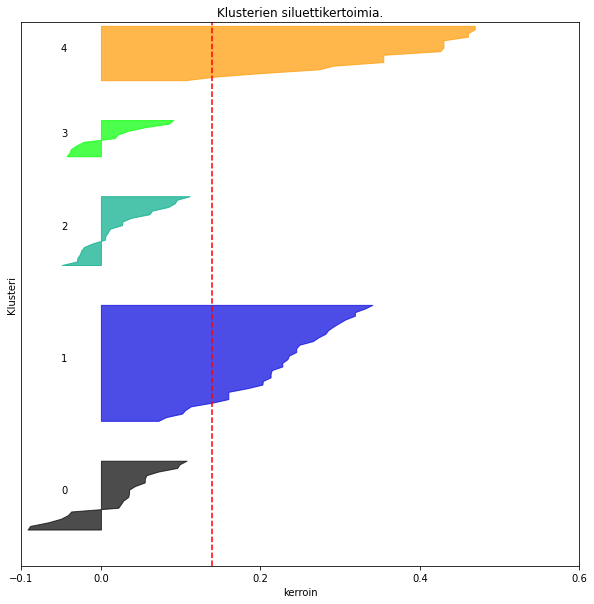

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim([-0.1, 0.6])
ax.set_ylim([0, len(df_customers.index) + 50])
y_lower = 10
for i in range(5):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 5)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
ax.set_title("Klusterien siluettikertoimia.")
ax.set_xlabel("kerroin")
ax.set_ylabel("Klusteri")
ax.axvline(x=silhouette_average, color='red', linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])

### Klusterien visualisointi

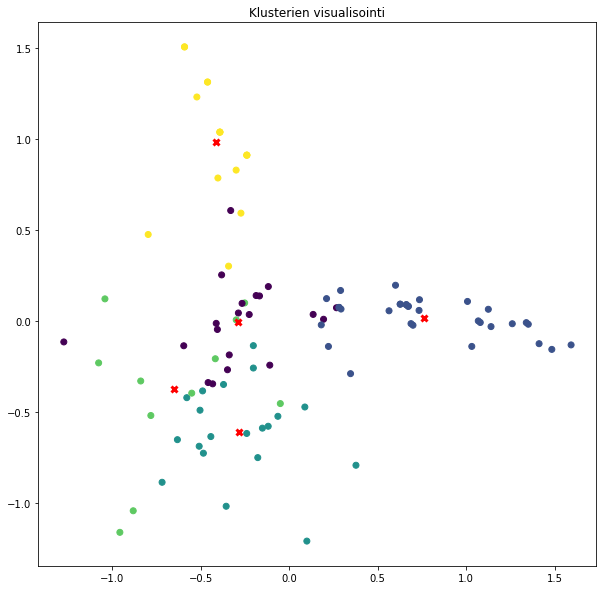

In [10]:
pca = PCA(n_components=2)
customer_x_y = pd.DataFrame(pca.fit_transform(df_customers))
customer_x_y = customer_x_y.assign(cluster=cluster_labels)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(x=customer_x_y[0], y=customer_x_y[1], c=customer_x_y['cluster'])
ax1.scatter(x=pd.DataFrame(pca.transform(kmeans.cluster_centers_))[0],
                 y=pd.DataFrame(pca.transform(kmeans.cluster_centers_))[1],
                 c='red', marker='x', linewidths=3)
ax1.set(title='Klusterien visualisointi')
plt.show()

Jotta data voidaan kuvata 2-ulotteisessa kuvaajassa, täytyy sen dimensioita vähentää. Pääkomponenttianalyysi muodostaa alkuperäisestä 32-ulotteisesta datasta kaksiulotteisen lineaarikombinaation.

## Klusterien ymmärtäminen

In [11]:
df_offers[list(df_offers.columns[:7])]

,Offer,Mth,Varietal,MinQty,Disc,Origin,PastPeak
0,1,Jan,Malbec,72,56,France,False
1,2,Jan,Pinot Noir,72,17,France,False
2,3,Feb,Espumante,144,32,Oregon,True
3,4,Feb,Champagne,72,48,France,True
4,5,Feb,Cab. Sauv.,144,44,NZ,True
5,6,Mar,Prosecco,144,86,Chile,False
6,7,Mar,Prosecco,6,40,Australia,True
7,8,Mar,Espumante,6,45,S. Africa,False
8,9,Apr,Chardonnay,144,57,Chile,False
9,10,Apr,Prosecco,72,52,CA,False


In [12]:
df_cluster_assignments = df_customers
#df_cluster_assignments.apply(lambda row: row[::31] * row['cluster'], axis = 1)
df_cluster_assignments

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Anders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wilson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Wood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wright,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
for row_i in range(len(df_cluster_assignments.index)):
     df_cluster_assignments.iloc[row_i] = df_cluster_assignments.iloc[row_i] * (customer_x_y['cluster'][row_i] +1)

In [14]:
df_cluster_assignments = df_cluster_assignments.transpose().apply(pd.Series.value_counts, axis=1)
df_cluster_assignments.head()

,0.0,1.0,2.0,3.0,4.0,5.0
0,90.0,1.0,NaN,3.0,4.0,2.0
1,90.0,1.0,NaN,1.0,1.0,7.0
2,94.0,NaN,1.0,5.0,NaN,NaN
3,88.0,3.0,NaN,7.0,2.0,NaN
4,96.0,2.0,NaN,NaN,2.0,NaN


In [15]:
df_cluster_assignments=df_cluster_assignments.drop(0.0, axis = 1).fillna(0)

In [16]:
df_final = pd.concat([df_offers[list(df_offers.columns[:7])], df_cluster_assignments],axis=1)

In [17]:
df_final.head()

,Offer,Mth,Varietal,MinQty,Disc,Origin,PastPeak,1.0,2.0,3.0,4.0,5.0
0,1,Jan,Malbec,72,56,France,False,1.0,0.0,3.0,4.0,2.0
1,2,Jan,Pinot Noir,72,17,France,False,1.0,0.0,1.0,1.0,7.0
2,3,Feb,Espumante,144,32,Oregon,True,0.0,1.0,5.0,0.0,0.0
3,4,Feb,Champagne,72,48,France,True,3.0,0.0,7.0,2.0,0.0
4,5,Feb,Cab. Sauv.,144,44,NZ,True,2.0,0.0,0.0,2.0,0.0


In [18]:
df_Mth = df_final[['Mth',1.0,2.0,3.0,4.0,5.0]].groupby(by='Mth').sum()
df_Varietal = df_final[['Varietal',1.0,2.0,3.0,4.0,5.0]].groupby(by='Varietal').sum()
df_MinQty = df_final[['MinQty',1.0,2.0,3.0,4.0,5.0]].groupby(by='MinQty').sum()
df_Disc = df_final[['Disc',1.0,2.0,3.0,4.0,5.0]].groupby(by='Disc').sum()
df_Origin = df_final[['Origin',1.0,2.0,3.0,4.0,5.0]].groupby(by='Origin').sum()
df_PastPeak = df_final[['PastPeak',1.0,2.0,3.0,4.0,5.0]].groupby(by='PastPeak').sum()

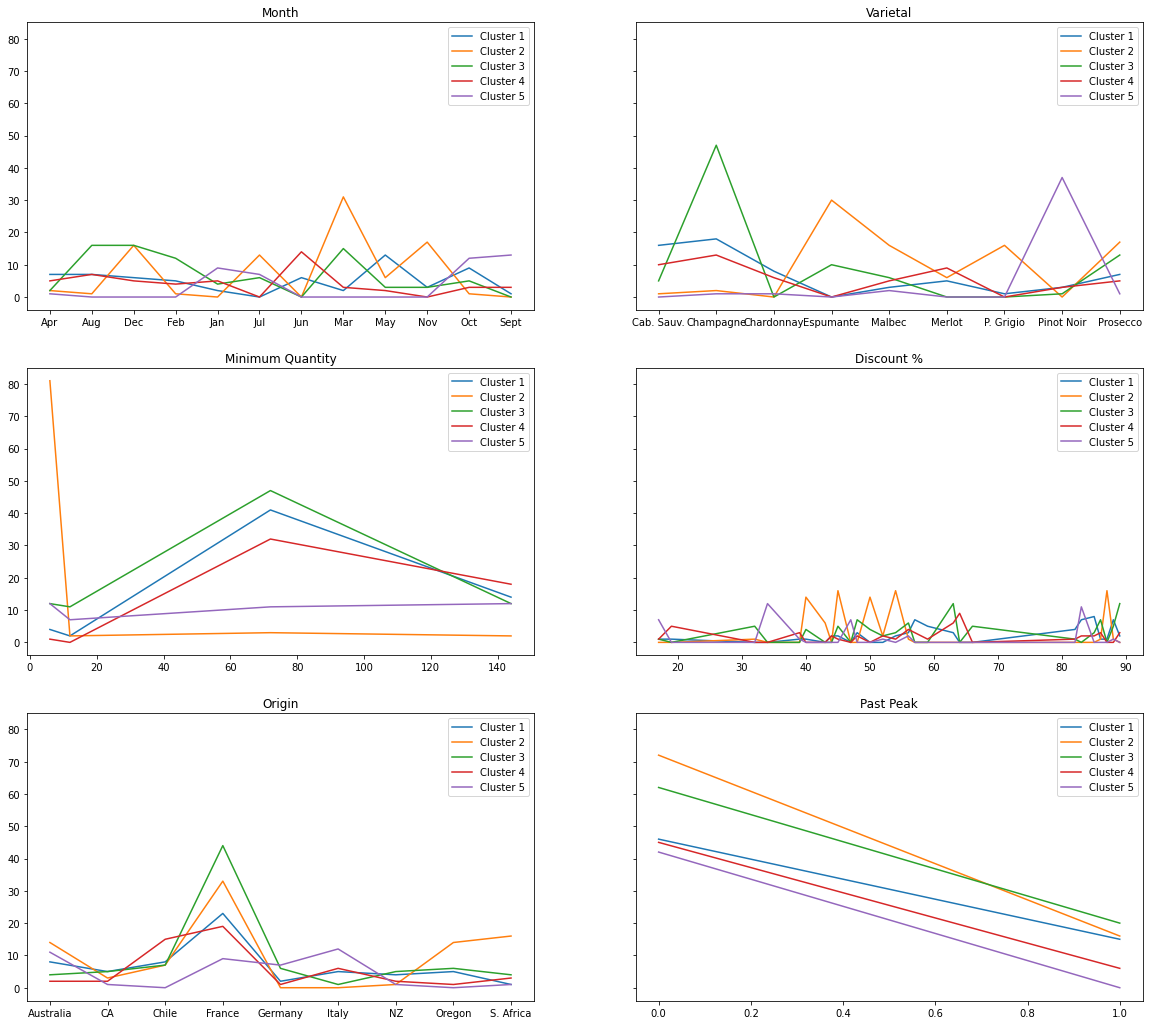

In [19]:
fig3, ((ax_mth,ax_varietal),(ax_minqty,ax_disc),(ax_origin,ax_pastpeak)) = plt.subplots(nrows=3, ncols=2,sharey=True, figsize=(20,18))
ax_mth.plot(list(df_Mth.index),df_Mth[1.0], label='Cluster 1')
ax_mth.plot(list(df_Mth.index),df_Mth[2.0], label='Cluster 2')
ax_mth.plot(list(df_Mth.index),df_Mth[3.0], label='Cluster 3')
ax_mth.plot(list(df_Mth.index),df_Mth[4.0], label='Cluster 4')
ax_mth.plot(list(df_Mth.index),df_Mth[5.0], label='Cluster 5')
ax_mth.legend()
ax_mth.set(title="Month")

ax_varietal.plot(list(df_Varietal.index),df_Varietal[1.0], label='Cluster 1')
ax_varietal.plot(list(df_Varietal.index),df_Varietal[2.0], label='Cluster 2')
ax_varietal.plot(list(df_Varietal.index),df_Varietal[3.0], label='Cluster 3')
ax_varietal.plot(list(df_Varietal.index),df_Varietal[4.0], label='Cluster 4')
ax_varietal.plot(list(df_Varietal.index),df_Varietal[5.0], label='Cluster 5')
ax_varietal.legend()
ax_varietal.set(title='Varietal')

ax_minqty.plot(list(df_MinQty.index),df_MinQty[1.0], label='Cluster 1')
ax_minqty.plot(list(df_MinQty.index),df_MinQty[2.0], label='Cluster 2')
ax_minqty.plot(list(df_MinQty.index),df_MinQty[3.0], label='Cluster 3')
ax_minqty.plot(list(df_MinQty.index),df_MinQty[4.0], label='Cluster 4')
ax_minqty.plot(list(df_MinQty.index),df_MinQty[5.0], label='Cluster 5')
ax_minqty.legend()
ax_minqty.set(title='Minimum Quantity')

ax_disc.plot(list(df_Disc.index),df_Disc[1.0], label='Cluster 1')
ax_disc.plot(list(df_Disc.index),df_Disc[2.0], label='Cluster 2')
ax_disc.plot(list(df_Disc.index),df_Disc[3.0], label='Cluster 3')
ax_disc.plot(list(df_Disc.index),df_Disc[4.0], label='Cluster 4')
ax_disc.plot(list(df_Disc.index),df_Disc[5.0], label='Cluster 5')
ax_disc.legend()
ax_disc.set(title="Discount %")

ax_origin.plot(list(df_Origin.index),df_Origin[1.0], label='Cluster 1')
ax_origin.plot(list(df_Origin.index),df_Origin[2.0], label='Cluster 2')
ax_origin.plot(list(df_Origin.index),df_Origin[3.0], label='Cluster 3')
ax_origin.plot(list(df_Origin.index),df_Origin[4.0], label='Cluster 4')
ax_origin.plot(list(df_Origin.index),df_Origin[5.0], label='Cluster 5')
ax_origin.legend()
ax_origin.set(title="Origin")

ax_pastpeak.plot(list(df_PastPeak.index),df_PastPeak[1.0], label='Cluster 1')
ax_pastpeak.plot(list(df_PastPeak.index),df_PastPeak[2.0], label='Cluster 2')
ax_pastpeak.plot(list(df_PastPeak.index),df_PastPeak[3.0], label='Cluster 3')
ax_pastpeak.plot(list(df_PastPeak.index),df_PastPeak[4.0], label='Cluster 4')
ax_pastpeak.plot(list(df_PastPeak.index),df_PastPeak[5.0], label='Cluster 5')
ax_pastpeak.legend()
ax_pastpeak.set(title="Past Peak")

fig.tight_layout()

Tämän perusteella voidaan sanoa, että ryhmä 2 ostaa kun tarjouksen pienin tilausmäärä (MinQty) on pieni. Ryhmä 3 ostaa samppakaljaa ja ryhmä 5 pinot noiria. Ryhmät 1 ja 4 jäävät vielä pimentoon, näillä ei tämän datan perusteella ole mitään tiettyä ostoa trendiä.